Import Library

In [ ]:
import os
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

Load Dataset

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = '/content/gdrive/MyDrive/PBI ID X Partners/Final Task/loan_data_2007_2014.csv'

In [ ]:
df = pd.read_csv(data, low_memory=False)
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Understanding

In [ ]:
#How many rows and columns in the dataset?
df.shape

(466285, 75)

In [ ]:
#General information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
#Checking for missing values
df.isna().sum()

,0
Unnamed: 0,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
...,...
all_util,466285
total_rev_hi_lim,70276
inq_fi,466285
total_cu_tl,466285


In [ ]:
#Menghapus kolom yang hanya berisi nilai NaN.
df = df.drop(columns = ['Unnamed: 0'])
df = df.dropna(axis=1, how='all')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [ ]:
#Menghapus unused columns
dropped = ['id', 'member_id', 'issue_d', 'url', 'delinq_2yrs', 'inq_last_6mths',
    'mths_since_last_delinq', 'mths_since_last_record', 'out_prncp',
    'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
    'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
    'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
    'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'tot_coll_amt',
    'tot_cur_bal', 'total_rev_hi_lim']

df = df.drop(dropped, axis=1)

# Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            466285 non-null  int64  
 1   funded_amnt          466285 non-null  int64  
 2   funded_amnt_inv      466285 non-null  float64
 3   term                 466285 non-null  object 
 4   int_rate             466285 non-null  float64
 5   installment          466285 non-null  float64
 6   grade                466285 non-null  object 
 7   sub_grade            466285 non-null  object 
 8   emp_title            438697 non-null  object 
 9   emp_length           445277 non-null  object 
 10  home_ownership       466285 non-null  object 
 11  annual_inc           466281 non-null  float64
 12  verification_status  466285 non-null  object 
 13  loan_status          466285 non-null  object 
 14  pymnt_plan           466285 non-null  object 
 15  desc             

In [ ]:
#Ringkasan statistik deskriptif dari dataset
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,policy_code,acc_now_delinq
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.0,466256.000000
mean,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,11.187069,0.160564,1.623020e+04,56.176947,25.064430,1.0,0.004002
std,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,4.987526,0.510863,2.067625e+04,23.732628,11.600141,0.0,0.068637
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1.0,0.000000
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,1.0,0.000000
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,1.0,0.000000
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,1.0,0.000000
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,1.0,5.000000


In [ ]:
#Melihat informasi tentang kolom-kolom yang memiliki tipe data string
df.select_dtypes(include=object).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 466285 non-null  object
 1   grade                466285 non-null  object
 2   sub_grade            466285 non-null  object
 3   emp_title            438697 non-null  object
 4   emp_length           445277 non-null  object
 5   home_ownership       466285 non-null  object
 6   verification_status  466285 non-null  object
 7   loan_status          466285 non-null  object
 8   pymnt_plan           466285 non-null  object
 9   desc                 125981 non-null  object
 10  purpose              466285 non-null  object
 11  title                466264 non-null  object
 12  zip_code             466285 non-null  object
 13  addr_state           466285 non-null  object
 14  earliest_cr_line     466256 non-null  object
 15  initial_list_status  466285 non-nu

In [ ]:
#Menghitung jumlah nilai unik dalam setiap kolom yang memiliki tipe data string
df.select_dtypes(include=object).nunique()

,0
term,2
grade,7
sub_grade,35
emp_title,205475
emp_length,11
home_ownership,6
verification_status,3
loan_status,9
pymnt_plan,2
desc,124435


In [ ]:
#Melihat informasi tentang kolom-kolom yang memiliki tipe data numerik
df.select_dtypes(include='number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   loan_amnt        466285 non-null  int64  
 1   funded_amnt      466285 non-null  int64  
 2   funded_amnt_inv  466285 non-null  float64
 3   int_rate         466285 non-null  float64
 4   installment      466285 non-null  float64
 5   annual_inc       466281 non-null  float64
 6   dti              466285 non-null  float64
 7   open_acc         466256 non-null  float64
 8   pub_rec          466256 non-null  float64
 9   revol_bal        466285 non-null  int64  
 10  revol_util       465945 non-null  float64
 11  total_acc        466256 non-null  float64
 12  policy_code      466285 non-null  int64  
 13  acc_now_delinq   466256 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 49.8 MB


In [ ]:
#Menghitung jumlah nilai unik dalam setiap kolom yang memiliki tipe data numerik.
df.select_dtypes(include='number').nunique()

,0
loan_amnt,1352
funded_amnt,1354
funded_amnt_inv,9854
int_rate,506
installment,55622
annual_inc,31901
dti,3997
open_acc,62
pub_rec,26
revol_bal,58142


In [ ]:
#Mendapatkan nilai unik dari setiap kolom dalam DataFrame
unique_values = df.apply(lambda x: x.unique())
unique_values

,0
loan_amnt,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
funded_amnt,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
funded_amnt_inv,"[4975.0, 2500.0, 2400.0, 10000.0, 3000.0, 5000..."
term,"[ 36 months, 60 months]"
int_rate,"[10.65, 15.27, 15.96, 13.49, 12.69, 7.9, 18.64..."
installment,"[162.87, 59.83, 84.33, 339.31, 67.79, 156.46, ..."
grade,"[B, C, A, E, F, D, G]"
sub_grade,"[B2, C4, C5, C1, B5, A4, E1, F2, C3, B1, D1, A..."
emp_title,"[nan, Ryder, AIR RESOURCES BOARD, University M..."
emp_length,"[10+ years, < 1 year, 1 year, 3 years, 8 years..."


In [ ]:
#Menghitung frekuensi kemunculan setiap nilai unik dalam kolom loan_status
df['loan_status'].value_counts()

,count
loan_status,
Current,224226
Fully Paid,184739
Charged Off,42475
Late (31-120 days),6900
In Grace Period,3146
Does not meet the credit policy. Status:Fully Paid,1988
Late (16-30 days),1218
Default,832
Does not meet the credit policy. Status:Charged Off,761


**Loan Status**

Untuk mempermudah proses pelatihan model dan meningkatkan akurasi prediksi, variabel 'loan_status' diklasifikasikan menjadi dua kategori:


*   0: Bad (pinjaman dengan tunggakan lebih dari 30 hari atau gagal bayar)
*   1: Good (pinjaman dengan pembayaran tepat waktu atau dengan pengecualian tertentu).

Dengan menggabungkan kelas `Fully Paid`, `Does not meet the credit policy. Status:Fully Paid`, `In Grace Period`, dan `Late (16 - 30 days)` menjadi satu kategori yang positif, serta menggabungkan kelas `Charged Off`, `Default`, `Does not meet the credit policy. Status:Charged Off`, `Late (31-120 days)` menjadi satu kategori yang negatif.
Pengurangan jumlah kategori ini memungkinkan model untuk lebih fokus pada faktor-faktor utama yang memengaruhi kelayakan kredit, sekaligus mengurangi risiko overfitting dan meningkatkan performa prediksi secara keseluruhan.

Kategori status kredit `Current` dikecualikan dari analisis karena masih dalam proses dan tidak dapat diprediksi. Sementara itu, kategori `Late (16-30 days)` dianggap sebagai pinjaman baik karena umumnya pinjaman tidak digolongkan buruk sebelum tunggakan melebihi 30 hari.




In [ ]:
good_classes = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'In Grace Period', 'Late (16 - 30 days)']
df_good = df[df['loan_status'].isin(good_classes)]
df_good.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,policy_code,application_type,acc_now_delinq
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,Jan-85,3.0,0.0,13648,83.7,9.0,f,1,INDIVIDUAL,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,Nov-01,2.0,0.0,2956,98.5,10.0,f,1,INDIVIDUAL,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Feb-96,10.0,0.0,5598,21.0,37.0,f,1,INDIVIDUAL,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,Nov-04,9.0,0.0,7963,28.3,12.0,f,1,INDIVIDUAL,0.0
7,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,...,Jan-07,4.0,0.0,8221,87.5,4.0,f,1,INDIVIDUAL,0.0


In [ ]:
df = df.loc[~df['loan_status'].isin(['Current'])].reset_index(drop=True)

In [ ]:
df_good['loan_status'].value_counts().sum()

189873

In [ ]:
df['loan_status'] = np.where(df['loan_status'].isin(["Fully Paid",
                                                     "Does not meet the credit policy. Status:Fully Paid",
                                                     "In Grace Period", "Late (16 - 30 days)"
                                                     ]),
                             "Good",
                             df['loan_status'])

In [ ]:
df['loan_status'] = np.where(df['loan_status'].isin(["Charged Off",
                                                     "Default",
                                                     "Does not meet the credit policy. Status:Charged Off",
                                                     "Late (31-120 days)"
                                                     ]),
                             "Bad",
                             df['loan_status'])

In [ ]:
df = df[df['loan_status'].isin(["Good", "Bad"])]

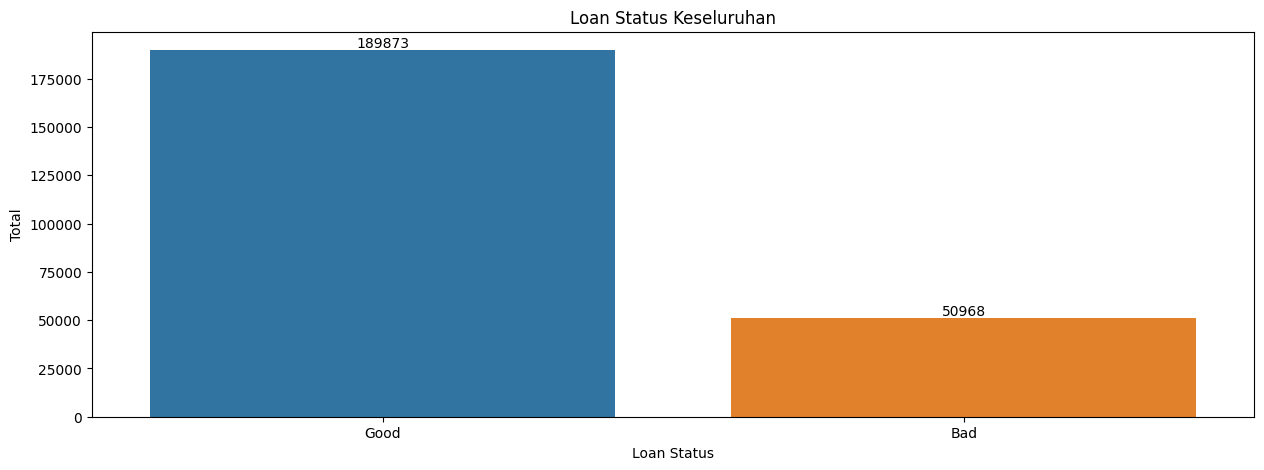

In [ ]:
plt.figure(figsize=(15, 5))

count = df['loan_status'].value_counts()
ax = sns.barplot(x=count.index, y=count.values, hue=count.index, legend=False)

for i, container in enumerate(ax.containers):
    ax.bar_label(container, fontsize=10)

ax.set_title('Loan Status Keseluruhan')
plt.xlabel('Loan Status')
plt.ylabel('Total')

plt.show()

In [ ]:
df['loan_status'].value_counts()

,count
loan_status,
Good,189873
Bad,50968


# Data Analysis
*   Univariate Analysis



In [ ]:
df['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [ ]:
df = df.drop(['application_type'], axis=1)

In [ ]:
df['policy_code'].unique()

array([1])

In [ ]:
df = df.drop(['policy_code'], axis=1)

In [ ]:
df['emp_title'].head(10)

,emp_title
0,NaN
1,Ryder
2,NaN
3,AIR RESOURCES BOARD
4,Veolia Transportaton
5,MKC Accounting
6,NaN
7,Starbucks
8,Southwest Rural metro
9,UCLA


In [ ]:
df['emp_title'].isna().sum()

13523

Berdasarkan hasil analisis pada tahap Deskripsi Variabel, variabel `emp_title` memiliki jumlah nilai unik yang sangat banyak. Selain itu, variabel ini juga mengandung *NaN* dalam jumlah besar, yaitu sebanyak 13.523. Banyaknya kategori dan nilai *NaN* tersebut berpotensi menimbulkan kebingungan selama proses pelatihan model. Oleh karena itu, kolom `emp_title` akan dihapus.

In [ ]:
df = df.drop(['emp_title'], axis=1)

In [ ]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '9 years', '4 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years',
       nan], dtype=object)

In [ ]:
#Cleaning emp_length values
df['emp_length'] = df['emp_length'].str.replace('\+ years', '')
df['emp_length'] = df['emp_length'].str.replace('< 1 year', str(0))
df['emp_length'] = df['emp_length'].str.replace(' years', '')
df['emp_length'] = df['emp_length'].str.replace(' year', '')
df['emp_length'] = df['emp_length'].str.replace('+', '')
df['emp_length'] = df['emp_length'].astype(float)

In [ ]:
#Looking at values in other columns
cat = df.select_dtypes (include= ['object'])

for col in cat.columns.tolist():
    print(df[col].value_counts()[:20])
    print('\n')

term
36 months    187679
60 months     53162
Name: count, dtype: int64


grade
B    72671
C    61583
A    39618
D    39144
E    18353
F     7457
G     2015
Name: count, dtype: int64


sub_grade
B3    17469
B4    16214
C1    14100
B2    14010
B5    13516
C2    13466
C3    12053
B1    11462
C4    11345
A5    11140
C5    10619
A4    10416
D1     9617
D2     8809
D3     7728
D4     7116
A3     6771
D5     5874
A2     5785
A1     5506
Name: count, dtype: int64


home_ownership
MORTGAGE    118230
RENT        102079
OWN          20304
OTHER          179
NONE            48
ANY              1
Name: count, dtype: int64


verification_status
Verified           89544
Not Verified       83533
Source Verified    67764
Name: count, dtype: int64


loan_status
Good    189873
Bad      50968
Name: count, dtype: int64


pymnt_plan
n    240835
y         6
Name: count, dtype: int64


desc
                                                                              230
Debt Consolidation                    

In [ ]:
#Dominated by a single value
df.drop('pymnt_plan', axis=1, inplace=True)

In [ ]:
#Melakukan pengecekkan pada kolom earliest_cr_line
df['earliest_cr_line'].head(10)

,earliest_cr_line
0,Jan-85
1,Apr-99
2,Nov-01
3,Feb-96
4,Nov-04
5,Jan-07
6,Apr-04
7,Sep-04
8,Jan-98
9,Oct-89


In [ ]:
#Mengubah kolom earliest_cr_line menjadi tipe data datetime. Kemudian menghasilkan deskripsi statistik dari kolom tersebut
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line'].describe()

,earliest_cr_line
count,240812
mean,1998-03-11 07:40:35.141105792
min,1969-01-01 00:00:00
25%,1994-09-01 00:00:00
50%,1999-05-01 00:00:00
75%,2002-09-01 00:00:00
max,2068-12-01 00:00:00


In [ ]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 62.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
import pandas as pd
print(pd.__version__)

2.2.2


In [ ]:
#Memperbaiki tanggal yang disimpan dalam format datetime
def fix_date(x):
    if pd.isnull(x):
        return np.nan
    if x.year > 2030:
        year = x.year - 100
    else:
        year = x.year
    return datetime.date(year, x.month, x.day)

df['earliest_cr_line'] = df['earliest_cr_line'].apply(fix_date)

In [ ]:
#Memberikan ringkasan statistik terkait kolom dengan tipe data datetime
df['earliest_cr_line'].describe()

,earliest_cr_line
count,240812
unique,634
top,2000-10-01
freq,2052


In [ ]:
#Format data dalam kolom earliest_cr_line dari datetime menjadi hanya tahun.
df['earliest_cr_line'] = pd.DatetimeIndex(df['earliest_cr_line']).year

In [ ]:
#Menghitung jumlah nilai unik dalam kolom earliest_cr_line.
df['earliest_cr_line'].nunique()

61

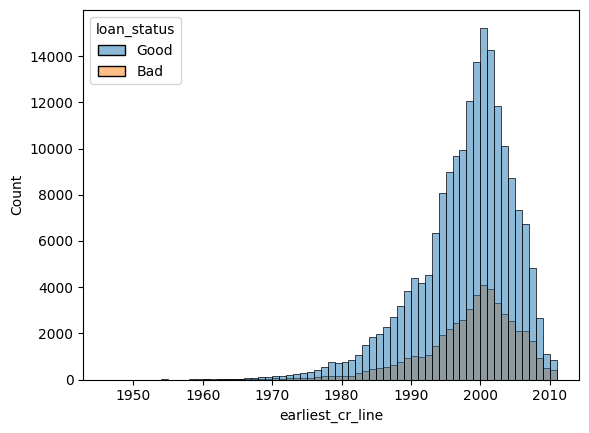

In [ ]:
#Menampilkan distribusi tanggal pada kolom earliest_cr_line.
sns.histplot(data=df, x="earliest_cr_line", hue="loan_status", bins=65)

plt.show()

In [ ]:
#Memberikan ringkasan statistik deskriptif pada kolom loan_amnt.
df['loan_amnt'].describe()

,loan_amnt
count,240841.000000
mean,13509.021512
std,8073.644323
min,500.000000
25%,7250.000000
50%,12000.000000
75%,18000.000000
max,35000.000000


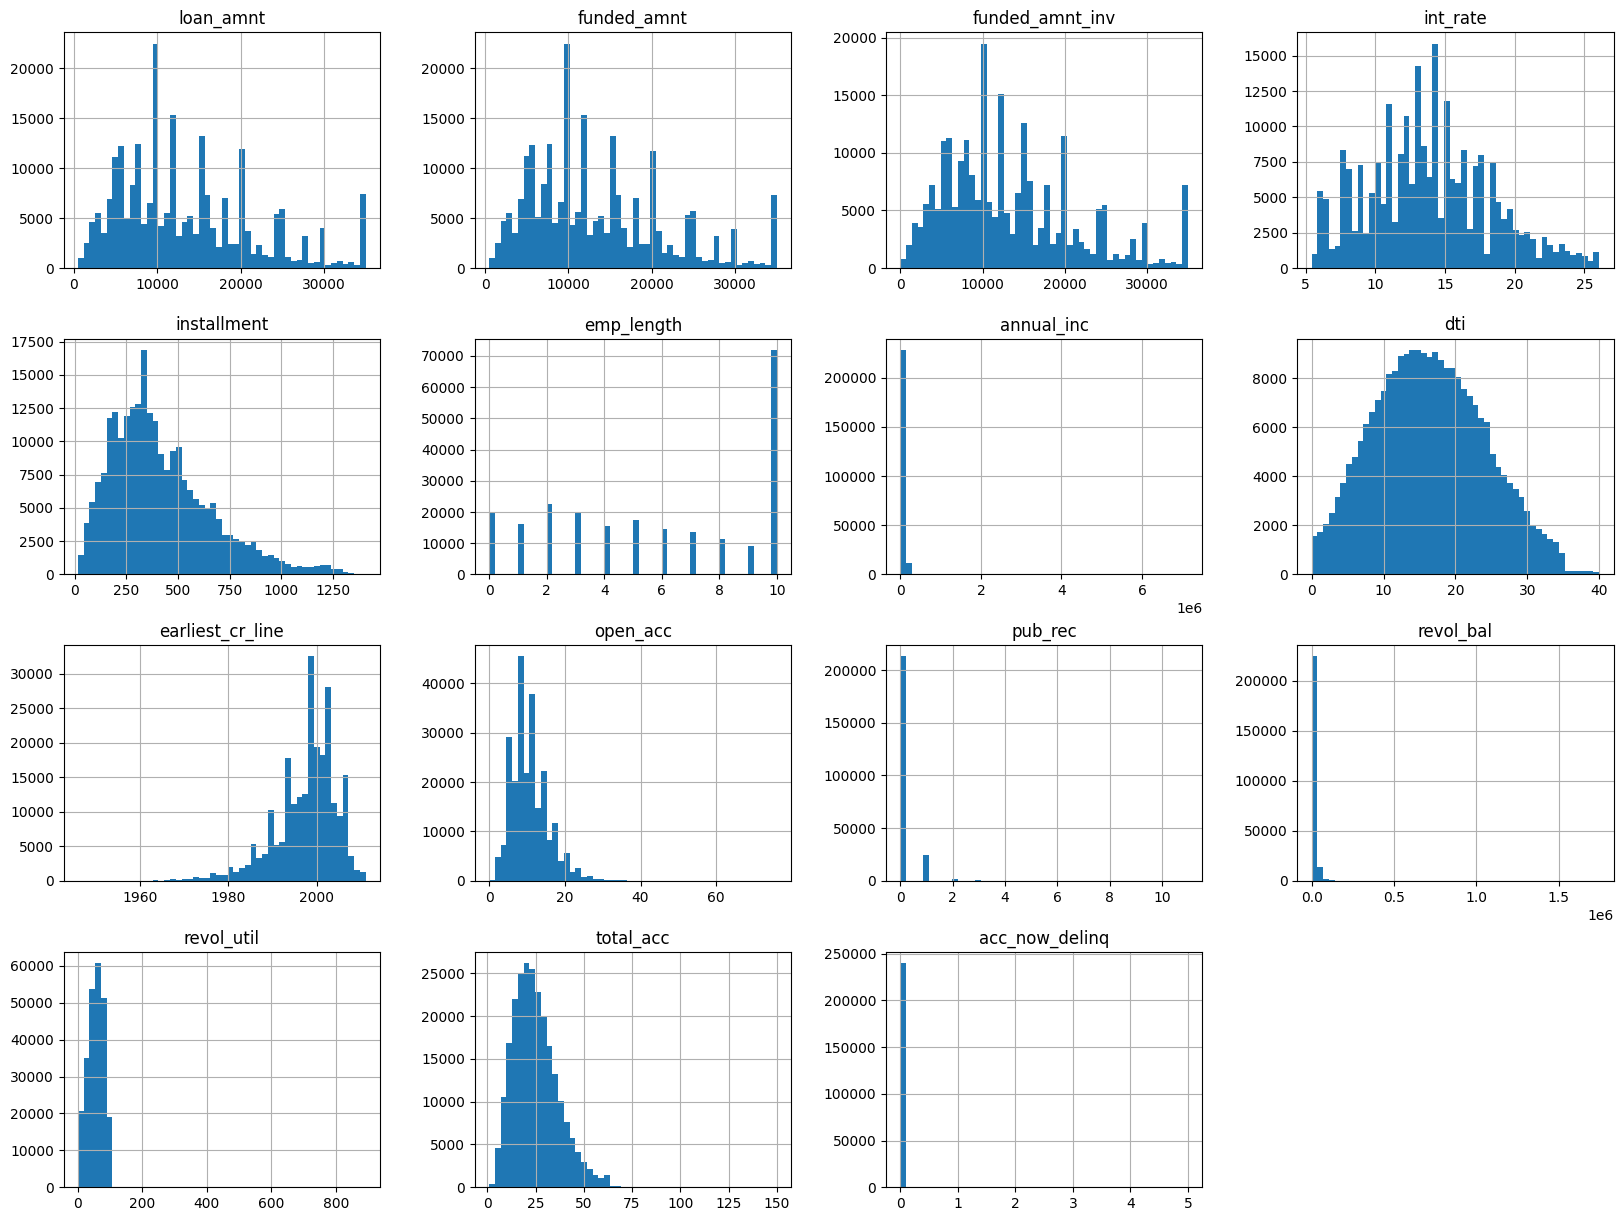

In [ ]:
#Membuat histogram untuk setiap kolom dalam DataFrame terhadap data yang bersifat numerik.
df.hist(bins=50, figsize=(20, 15))
plt.show()



*   Multivariate Analysis



In [ ]:
#Melakukan pengecekkan pada kolom desc, purpose, and title
df[['desc', 'purpose', 'title']].head(10)

,desc,purpose,title
0,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer
1,Borrower added on 12/22/11 > I plan to use t...,car,bike
2,NaN,small_business,real estate business
3,Borrower added on 12/21/11 > to pay for prop...,other,personel
4,NaN,wedding,My wedding loan I promise to pay back
5,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment
6,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio
7,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.
8,Borrower added on 12/15/11 > I had recived a...,debt_consolidation,High intrest Consolidation
9,NaN,debt_consolidation,Consolidation


In [ ]:
df['desc_is_null'] = df['desc'].isnull()

In [ ]:

df['desc_is_null'].value_counts()

,count
desc_is_null,
True,148362
False,92479


In [ ]:
#Menghapus kolom desc
df = df.drop('desc', axis=1)

In [ ]:
df = df.drop('desc_is_null', axis=1)

In [ ]:
#Menghitung jumlah nilai unik yang muncul dalam kolom title dan purpose. Kemudian mengambil sepuluh kombinasi nilai unik yang paling umum

df[['title', 'purpose']].value_counts()[:10]

,,count
title,purpose,
Debt consolidation,debt_consolidation,60976
Credit card refinancing,credit_card,19822
Debt Consolidation,debt_consolidation,10633
Home improvement,home_improvement,5396
Other,other,4950
debt consolidation,debt_consolidation,3144
Consolidation,debt_consolidation,3126
Debt Consolidation Loan,debt_consolidation,3009
Major purchase,major_purchase,1742


Berdasarkan hasil di atas, dapat disimpulkan bahwa variabel `purpose` secara langsung berasal dari `title`. Dengan demikian, `title` dianggap sebagai variabel yang redundan karena telah direpresentasikan dalam bentuk purpose.

In [ ]:
#Menghapus kolom title
df = df.drop('title', axis=1)

In [ ]:
#Melakukan pengecekkan pada kolom zip_code dan addr_state
df[['zip_code', 'addr_state']].head(5)

,zip_code,addr_state
0,860xx,AZ
1,309xx,GA
2,606xx,IL
3,917xx,CA
4,852xx,AZ


In [ ]:
#Menghitung jumlah kemunculan (count) kombinasi nilai dari dua kolom, yaitu zip_code dan addr_state

df[['zip_code', 'addr_state']].value_counts()[:20]

,,count
zip_code,addr_state,
945xx,CA,3070
112xx,NY,2779
750xx,TX,2619
100xx,NY,2459
900xx,CA,2380
606xx,IL,2376
331xx,FL,2190
300xx,GA,2168
070xx,NJ,2139


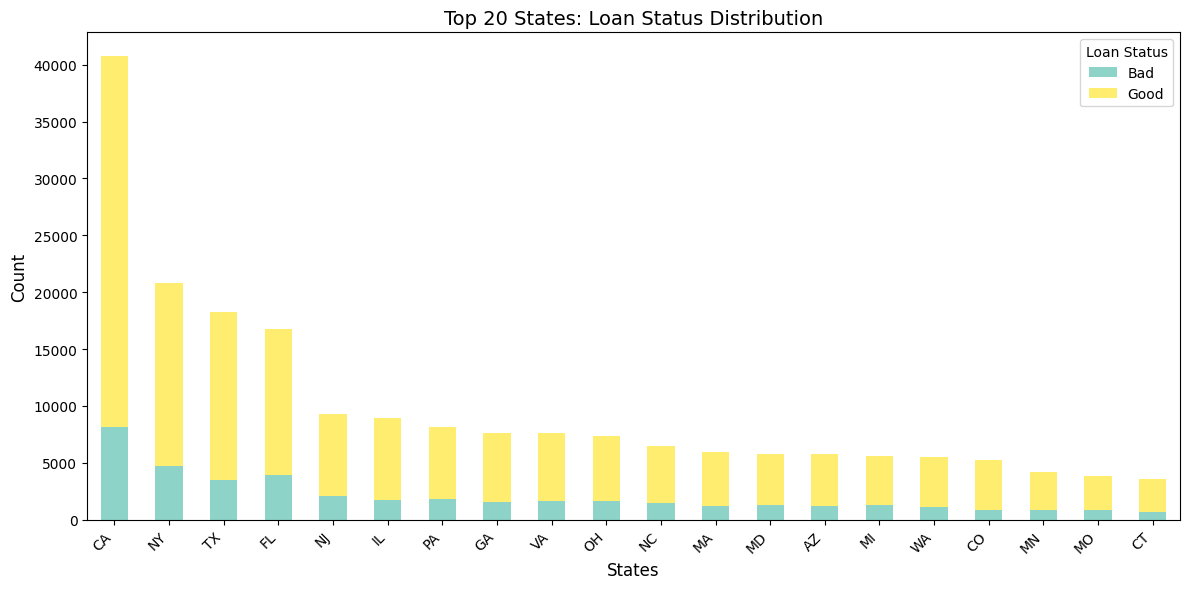

In [ ]:
# Filter data untuk top 20 states
top_states = df['addr_state'].value_counts()[:20].index
filtered_df = df[df['addr_state'].isin(top_states)]

# Membuat pivot table untuk distribusi loan_status terhadap addr_state
data_plot = filtered_df.pivot_table(index='addr_state', columns='loan_status', aggfunc='size', fill_value=0)

# Menambahkan kolom total dan mengurutkan
data_plot['Total'] = data_plot.sum(axis=1)
data_plot = data_plot.sort_values(by='Total', ascending=False)
data_plot = data_plot.drop(columns='Total')  # Hapus kolom Total setelah sorting

# Plot stacked bar chart
data_plot.plot(kind='bar', stacked=True, colormap='Set3', figsize=(12, 6))

# Menambahkan detail plot
plt.title('Top 20 States: Loan Status Distribution', fontsize=14)
plt.xlabel('States', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status')
plt.tight_layout()

plt.show()


In [ ]:
state_bad_loan_ratio = df.groupby('addr_state')['loan_status'].value_counts(normalize=True).unstack()
# Access columns by name 'Bad' and 'Good' instead of index 0 and 1
state_bad_loan_ratio['bad_loan_ratio'] = state_bad_loan_ratio['Bad'] / (state_bad_loan_ratio['Good'] + state_bad_loan_ratio['Bad'])

state_bad_loan_ratio = state_bad_loan_ratio.sort_values(by='bad_loan_ratio', ascending=False)

print(state_bad_loan_ratio)

print("\nTop 5 highest bad loan ratio states:")
print(state_bad_loan_ratio['bad_loan_ratio'].head(5))

print("\nTop 5 lowest bad loan ratio states:")
print(state_bad_loan_ratio['bad_loan_ratio'].tail(5))

loan_status       Bad      Good  bad_loan_ratio
addr_state                                     
NE           0.571429  0.428571        0.571429
MS           0.322086  0.677914        0.322086
TN           0.293728  0.706272        0.293728
IN           0.271406  0.728594        0.271406
NV           0.249651  0.750349        0.249651
AL           0.240120  0.759880        0.240120
FL           0.236339  0.763661        0.236339
OK           0.231707  0.768293        0.231707
IA           0.230769  0.769231        0.230769
NM           0.229647  0.770353        0.229647
MI           0.228526  0.771474        0.228526
AR           0.227998  0.772002        0.227998
LA           0.227839  0.772161        0.227839
MO           0.226474  0.773526        0.226474
HI           0.225737  0.774263        0.225737
NY           0.225641  0.774359        0.225641
NC           0.224133  0.775867        0.224133
OH           0.223579  0.776421        0.223579
KY           0.222635  0.777365        0

In [ ]:
#Menghapus kolom zip_code
df = df.drop('zip_code', axis=1)

grade dan sub grade

In [ ]:
#Menampilkan nilai unik yang terdapat dalam kolom grade dan sub grade
print(df['grade'].unique())
print(df['sub_grade'].unique())

['B' 'C' 'A' 'E' 'F' 'D' 'G']
['B2' 'C4' 'C5' 'C1' 'A4' 'E1' 'F2' 'B5' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F1' 'E5' 'G4'
 'E2' 'G2' 'G1' 'F5' 'F4' 'G5' 'G3']


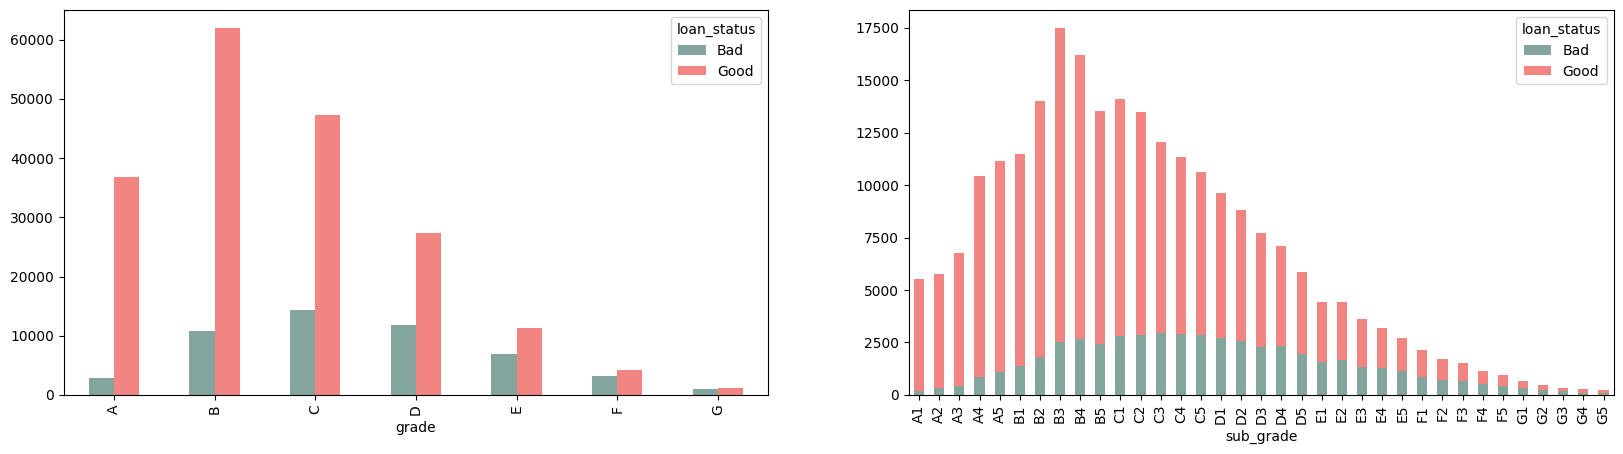

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 5))
colors_grade = ['#84a59d', '#f28482']
pd.crosstab(df['grade'], df['loan_status']).plot(kind='bar', ax=axs[0], color=colors_grade)

colors_subgrade = ['#84a59d', '#f28482']
pd.crosstab(df['sub_grade'], df['loan_status']).plot(kind='bar', stacked=True, ax=axs[1], color=colors_subgrade)

plt.show()

In [ ]:
#Membuat tabel silang antara kolom grade dan loan_status dan menormalisasi berdasarkan baris ('index')

pd.crosstab(df['grade'], df['loan_status'], normalize='index').round(2)

loan_status,Bad,Good
grade,,
A,0.07,0.93
B,0.15,0.85
C,0.23,0.77
D,0.30,0.70
E,0.38,0.62
F,0.43,0.57
G,0.46,0.54


In [ ]:
#Membuat tabel silang antara kolom sub_grade dan loan_status dan menormalisasi berdasarkan baris ('index')

pd.crosstab(df['sub_grade'], df['loan_status'], normalize='index').round(2)

loan_status,Bad,Good
sub_grade,,
A1,0.04,0.96
A2,0.05,0.95
A3,0.06,0.94
A4,0.08,0.92
A5,0.10,0.90
B1,0.12,0.88
B2,0.13,0.87
B3,0.14,0.86
B4,0.16,0.84


Dari informasi di atas, dapat disimpulkan bahwa setiap `sub_grade` sudah merepresentasikan `grade`. Oleh karena itu, variabel `grade` dapat dihapus untuk mengurangi redundansi data.

In [ ]:
#Menghapus kolom grade
df = df.drop('grade', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240841 entries, 0 to 242058
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            240841 non-null  int64  
 1   funded_amnt          240841 non-null  int64  
 2   funded_amnt_inv      240841 non-null  float64
 3   term                 240841 non-null  object 
 4   int_rate             240841 non-null  float64
 5   installment          240841 non-null  float64
 6   sub_grade            240841 non-null  object 
 7   emp_length           231583 non-null  float64
 8   home_ownership       240841 non-null  object 
 9   annual_inc           240837 non-null  float64
 10  verification_status  240841 non-null  object 
 11  loan_status          240841 non-null  object 
 12  purpose              240841 non-null  object 
 13  addr_state           240841 non-null  object 
 14  dti                  240841 non-null  float64
 15  earliest_cr_line     2

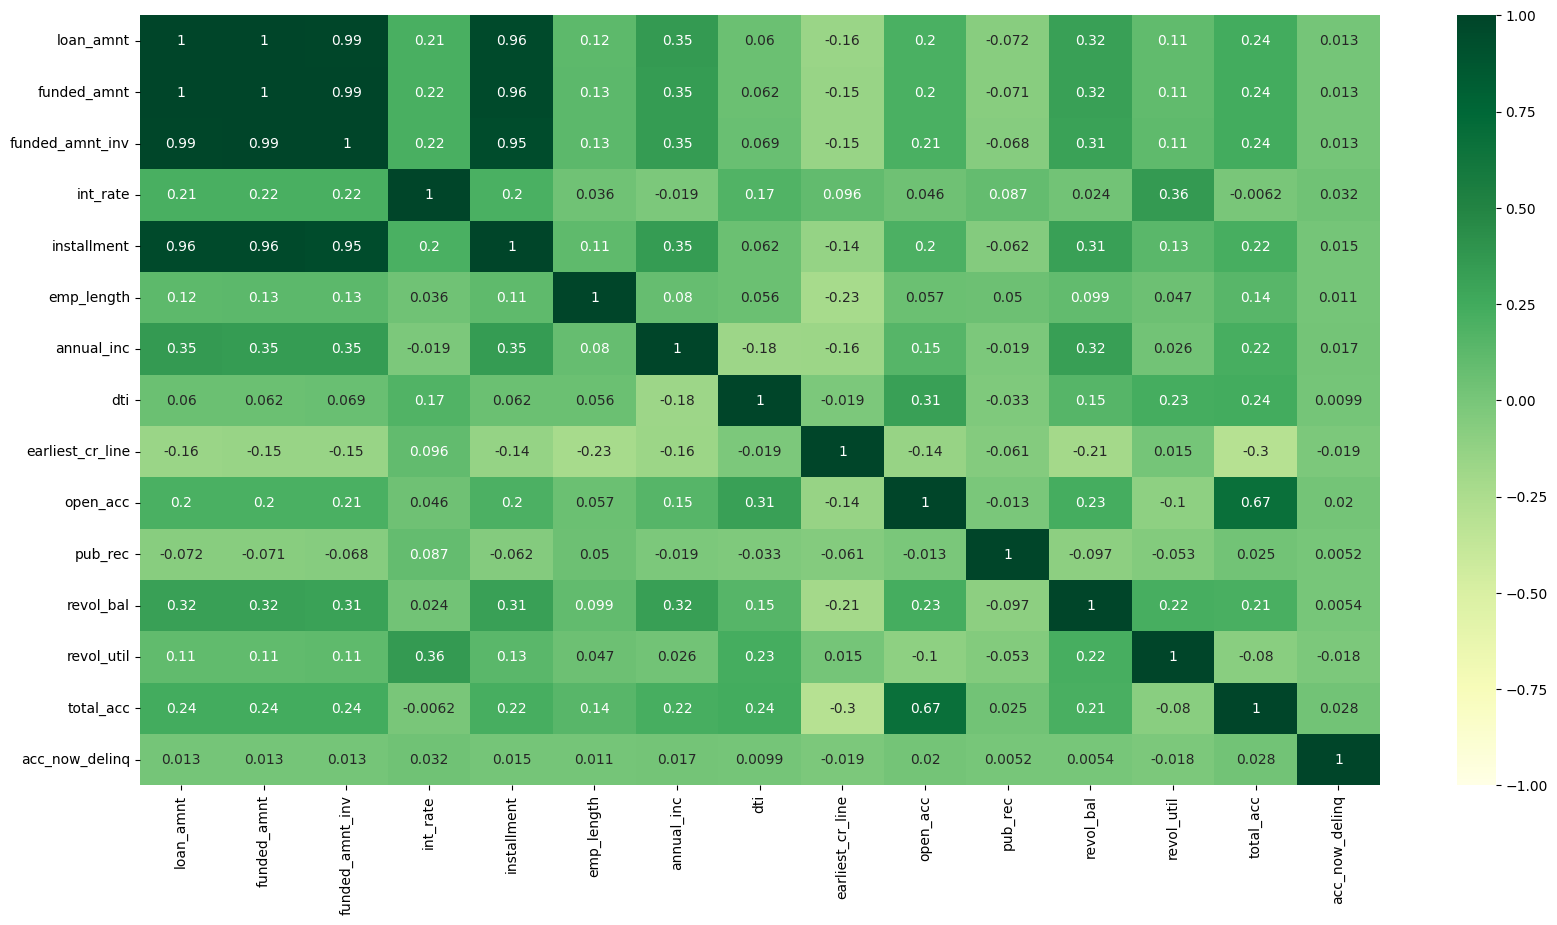

In [ ]:
#Membuat sebuah plot heatmap yang menampilkan matriks korelasi antar variabel.
plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap="YlGn")

plt.show()

Variabel `loan_amnt`,`funded_amnt`, dan `funded_amnt_inv` menunjukkan korelasi sempurna, yang mengindikasikan bahwa ketiganya bersifat redundan. Oleh karena itu, diputuskan untuk hanya menggunakan variabel `loan_amnt`, karena berdasarkan Data Dictionary, perubahan jumlah pinjaman tercermin pada variabel tersebut.

In [ ]:
#Menghapus variabel yang redundan dan tidak relevan
df = df.drop(['funded_amnt', 'funded_amnt_inv'], axis=1)

**loan_amnt dan installment**

Terdapat korelasi yang signifikan antara variabel `loan_amnt` dan `installment`. Oleh karena itu, kedua variabel tersebut akan dieksplorasi guna menentukan apakah terdapat duplikasi informasi di antara keduanya serta memahami hubungan keduanya dengan variabel target.

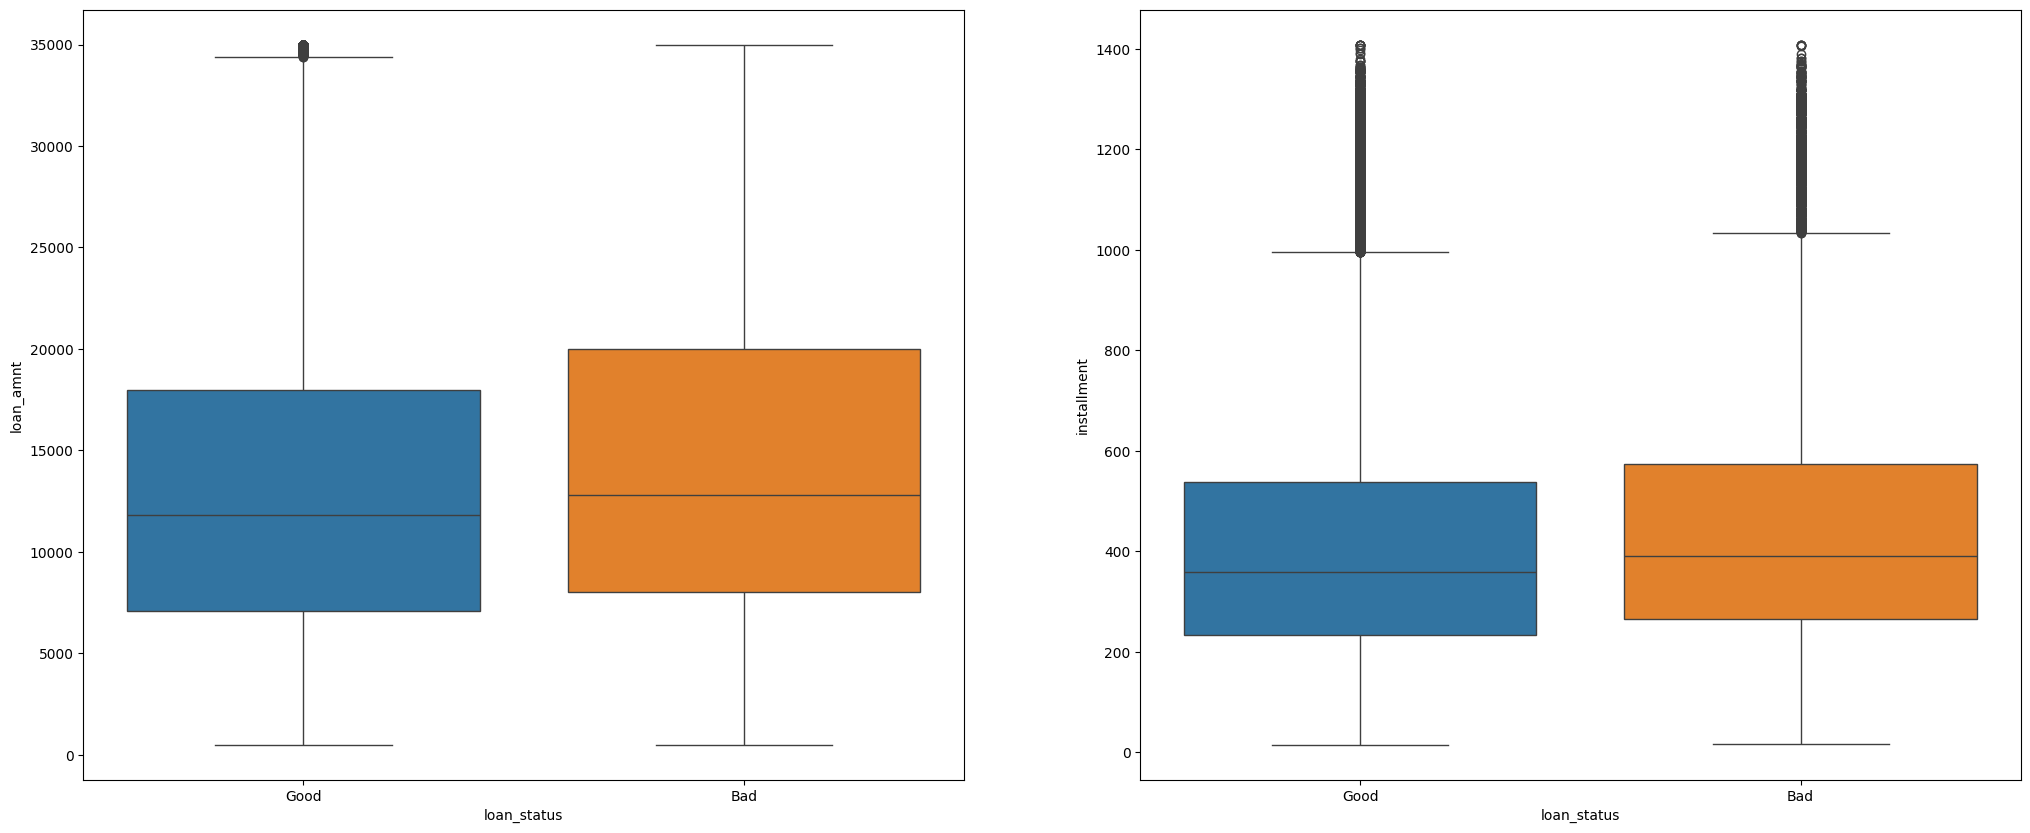

In [ ]:
#Membuat subplot masing-masing variabel dengan dua boxplot secara horizontal.
fig, axs = plt.subplots(ncols=2, figsize=(25, 10))
sns.boxplot(x='loan_status', y='loan_amnt', data=df, ax=axs[0], hue='loan_status', legend=False)
sns.boxplot(x='loan_status', y='installment', data=df, ax=axs[1], hue='loan_status', legend=False)

plt.show()

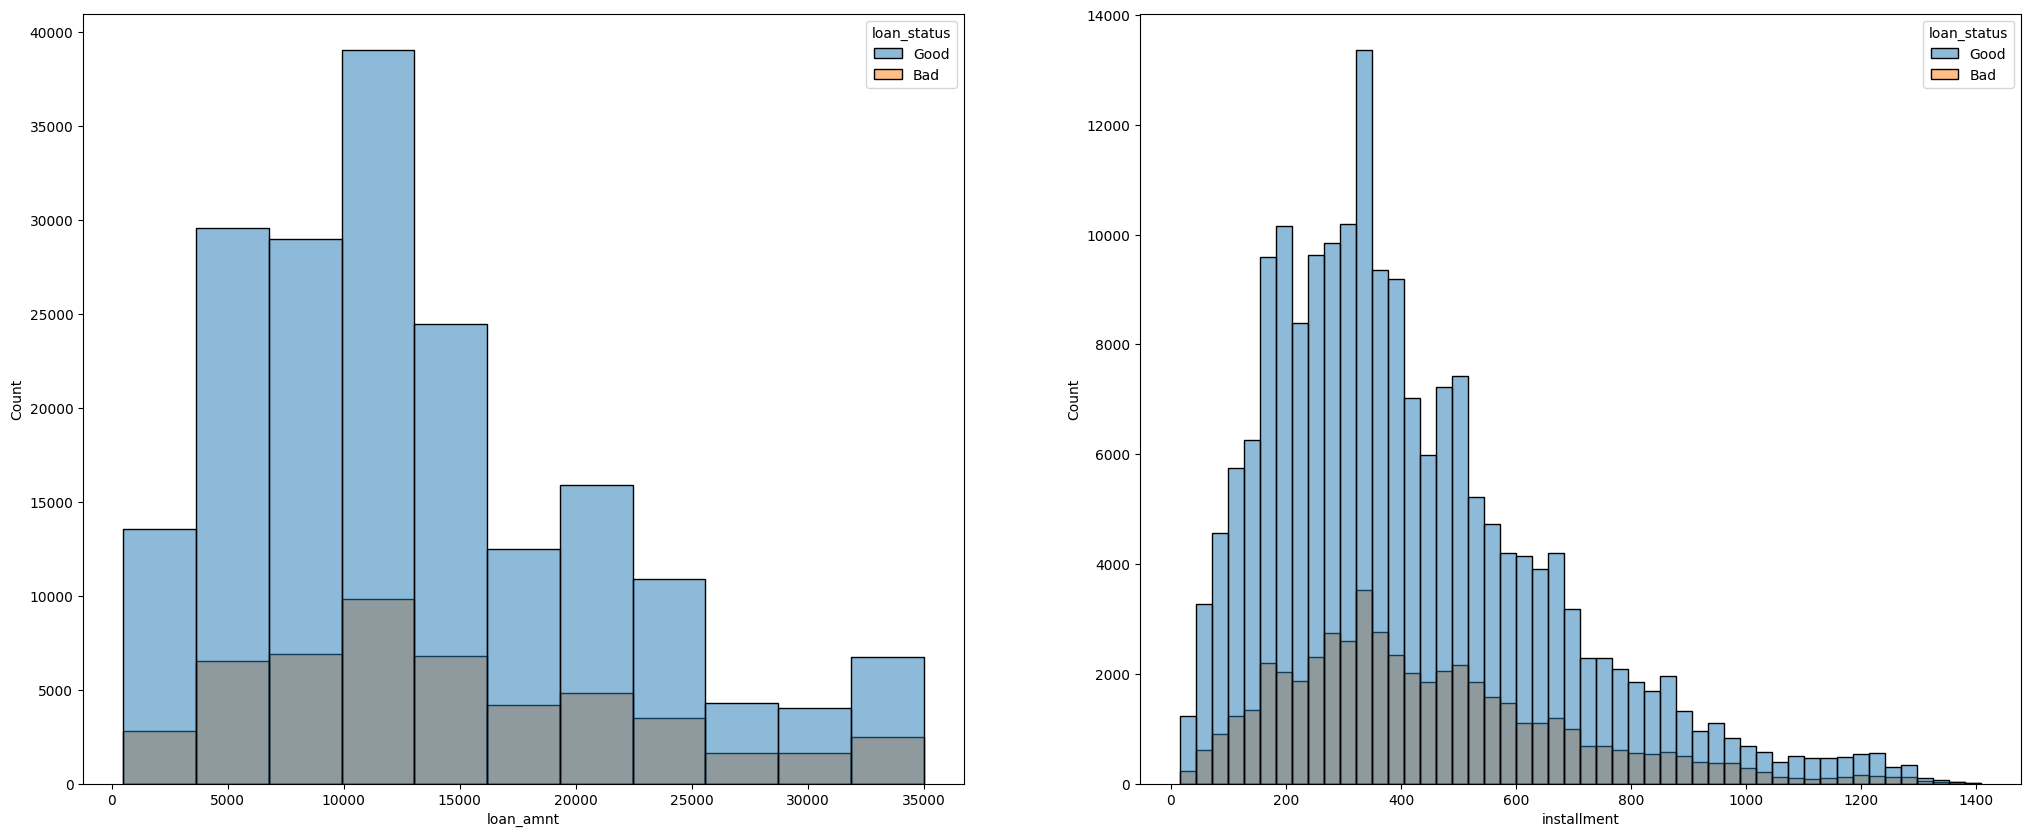

In [ ]:
#Membuat subplot dengan dua histogram secara horizontal
fig, axs = plt.subplots(ncols=2, figsize=(25, 10))
sns.histplot(data=df, x="loan_amnt", hue="loan_status", bins=11, ax=axs[0])
sns.histplot(data=df, x="installment", hue="loan_status", bins=50, ax=axs[1])

plt.show()
plt.show()

Hasil observasi terhadap distribusi variabel `loan_amnt` dan `installment `menunjukkan tidak adanya redundansi informasi. Hal ini karena `installment` merepresentasikan jumlah pembayaran bulanan yang dihitung berdasarkan loan_amnt, term, dan int_rate. Oleh karena itu, kedua variabel tersebut tetap relevan untuk digunakan, guna meningkatkan interpretabilitas model. Selain itu, `installment` memiliki hubungan erat dengan karakteristik pinjaman, sehingga dapat menjadi variabel penting dalam eksperimen pemodelan untuk memaksimalkan kualitas prediksi.

# Data Preparation


*   Handle Missing Data
    
    Melakukan pemeriksaan pada setiap kolom dalam DataFrame. Jika ditemukan nilai yang hilang (NaN), kode akan menampilkan nama kolom, jumlah nilai yang hilang, serta persentasenya terhadap total data.



In [ ]:
for column in df.columns:
    if df[column].isna().sum() != 0:
        missing = df[column].isna().sum()
        missing_prob = (missing / df.shape[0]) * 100
        print(f"{column}: {missing}({missing_prob:.2f}%)")

emp_length: 9258(3.84%)
annual_inc: 4(0.00%)
earliest_cr_line: 29(0.01%)
open_acc: 29(0.01%)
pub_rec: 29(0.01%)
revol_util: 233(0.10%)
total_acc: 29(0.01%)
acc_now_delinq: 29(0.01%)


In [ ]:
#Membuat tabel silang (crosstab) antara kolom emp_length dan loan_status
pd.crosstab(df['emp_length'], df['loan_status'], normalize='index').round(2)

loan_status,Bad,Good
emp_length,,
0.0,0.21,0.79
1.0,0.20,0.80
2.0,0.20,0.80
3.0,0.20,0.80
4.0,0.20,0.80
5.0,0.20,0.80
6.0,0.21,0.79
7.0,0.21,0.79
8.0,0.22,0.78


Proporsi `loan_status` di antara kategori `emp_length` terlihat sangat mirip. Namun, sebelum memutuskan apakah kolom tersebut perlu dihapus, penting untuk terlebih dahulu memeriksa komposisi `emp_length` yang memiliki nilai NaN.

In [ ]:
df[df['emp_length'].isnull()]['loan_status'].value_counts()

,count
loan_status,
Good,6472
Bad,2786


Berdasarkan informasi di atas, `emp_length` dengan nilai NaN masih mengandung banyak data penting dari klien, baik kategori Good maupun Bad. Menghapus baris dengan nilai NaN pada `emp_length` akan menghilangkan sejumlah besar informasi berharga tersebut. Oleh karena itu, lebih tepat untuk menghapus kolom `emp_length` secara keseluruhan.

In [ ]:
df = df.drop('emp_length', axis=1)

Melihat komposisi dari annual_inc, earliest_cr_line, open_acc, pub_rec, revol_util, total_acc, acc_now_delinq yang memiliki nilai NaN.

In [ ]:
columns_to_check = ['annual_inc', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'acc_now_delinq']

for column in columns_to_check:
    print(f"Jumlah dari kolom {column} yang memiliki nilai NaN:")
    print(df[df[column].isnull()]['loan_status'].value_counts())
    print("")

Jumlah dari kolom annual_inc yang memiliki nilai NaN:
loan_status
Good    4
Name: count, dtype: int64

Jumlah dari kolom earliest_cr_line yang memiliki nilai NaN:
loan_status
Good    26
Bad      3
Name: count, dtype: int64

Jumlah dari kolom open_acc yang memiliki nilai NaN:
loan_status
Good    26
Bad      3
Name: count, dtype: int64

Jumlah dari kolom pub_rec yang memiliki nilai NaN:
loan_status
Good    26
Bad      3
Name: count, dtype: int64

Jumlah dari kolom revol_util yang memiliki nilai NaN:
loan_status
Good    175
Bad      58
Name: count, dtype: int64

Jumlah dari kolom total_acc yang memiliki nilai NaN:
loan_status
Good    26
Bad      3
Name: count, dtype: int64

Jumlah dari kolom acc_now_delinq yang memiliki nilai NaN:
loan_status
Good    26
Bad      3
Name: count, dtype: int64



Berdasarkan informasi mengenai komposisi data, jumlah nilai NaN pada kolom `annual_inc`, `earliest_cr_line`, `open_acc`, `pub_rec`, `revol_util`, `total_acc`, dan `acc_now_delinq` tergolong kecil. Oleh karena itu, diputuskan untuk menghapus baris-baris yang mengandung nilai NaN pada kolom-kolom tersebut.

In [ ]:
cols = ['annual_inc', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'acc_now_delinq']
for col in cols:
  df = df[df[col].notnull()]




*   Convert to Numeric Variable




In [ ]:
df.select_dtypes(include=np.number).info()

<class 'pandas.core.frame.DataFrame'>
Index: 240608 entries, 0 to 242058
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_amnt         240608 non-null  int64  
 1   int_rate          240608 non-null  float64
 2   installment       240608 non-null  float64
 3   annual_inc        240608 non-null  float64
 4   dti               240608 non-null  float64
 5   earliest_cr_line  240608 non-null  float64
 6   open_acc          240608 non-null  float64
 7   pub_rec           240608 non-null  float64
 8   revol_bal         240608 non-null  int64  
 9   revol_util        240608 non-null  float64
 10  total_acc         240608 non-null  float64
 11  acc_now_delinq    240608 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 23.9 MB


In [ ]:
#Mengubah tipe data kolom tertentu dalam DataFrame df menjadi tipe data yang sesuai dengan kebutuhan pemodelan.

col_to_int = ['earliest_cr_line', 'open_acc', 'pub_rec',
              'total_acc', 'acc_now_delinq']
col_to_float = ['revol_bal', 'loan_amnt']

df[col_to_int] = df[col_to_int].astype(int)
df[col_to_float] = df[col_to_float].astype(float)



*   Remove Outliers





In [ ]:
cols = df.select_dtypes(float).columns
df_sub = df.loc[:, cols]

Menghasilkan boxplot yang menunjukkan distribusi batas atas dan batas bawah yang digunakan untuk mendeteksi outlier dalam DataFrame.

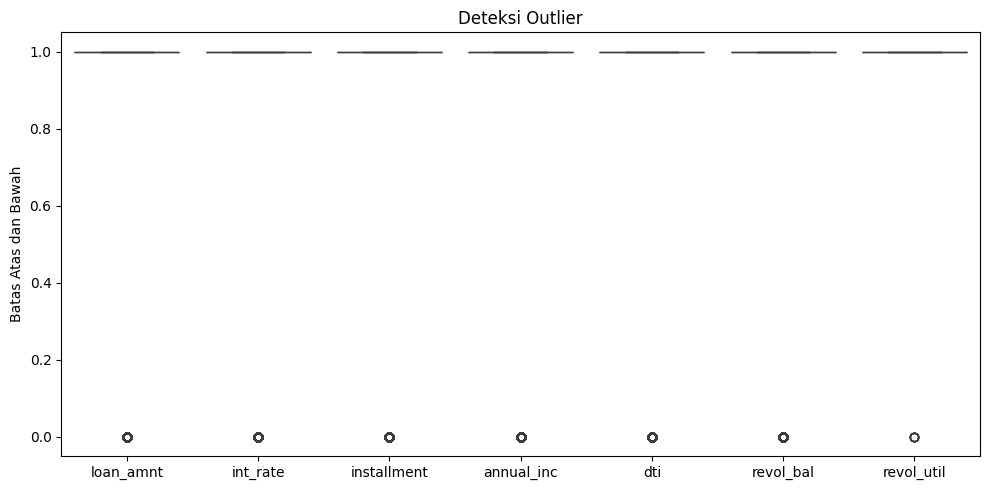

In [ ]:
Q1 = df_sub.quantile(0.25)
Q3 = df_sub.quantile(0.75)
IQR=Q3-Q1

outliers = ~((df_sub < (Q1 - 1.5 * IQR)) | (df_sub > (Q3 + 1.5 * IQR)))

plt.figure(figsize=(10, 5))
sns.boxplot(data=outliers)
plt.title('Deteksi Outlier')
plt.ylabel('Batas Atas dan Bawah')
plt.tight_layout()
plt.show()

Membersihkan outlier dari DataFrame dengan mengganti nilai-nilai outlier dengan NaN dan menghapus baris-baris yang mengandung NaN dalam kolom-kolom yang dipilih.

In [ ]:
df.loc[:, cols] = df_sub.where(outliers, np.nan)
df.dropna(subset=cols, inplace=True)

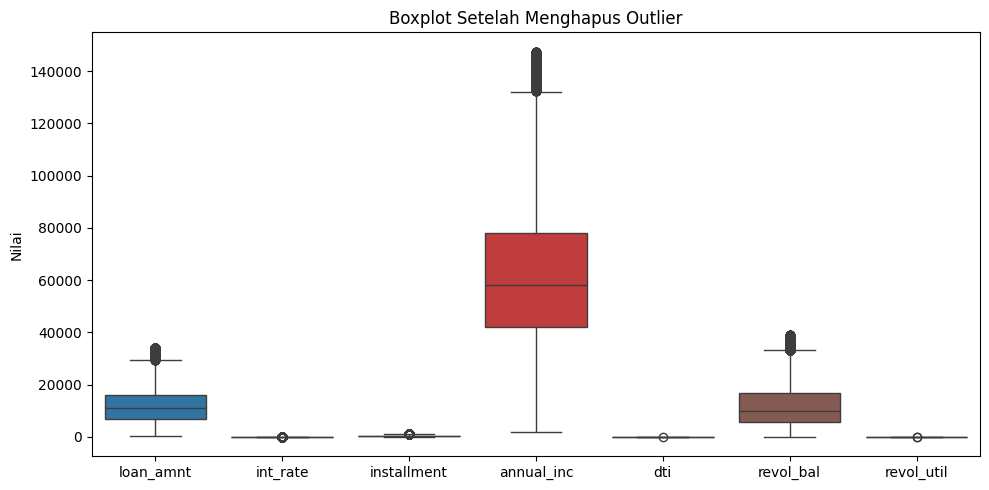

In [ ]:
#Menampilkan visualisasi data menggunakan boxplot setelah menghapus outlier.
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[cols])
plt.title('Boxplot Setelah Menghapus Outlier')
plt.ylabel('Nilai')
plt.tight_layout()
plt.show()



*   One-Hot Encoding



In [ ]:
#Membuat sebuah objek LabelEncoder yang dapat digunakan untuk melakukan encoding pada label kelas.
le = LabelEncoder()

In [ ]:
#Melakukan encoding pada kolom loan_status
df.loan_status = le.fit_transform(df.loan_status)

In [ ]:
#Mencetak daftar kelas unik yang telah dipelajari oleh objek LabelEncoder
print(le.classes_)

['Bad' 'Good']


In [ ]:
#Mengubah label kelas dalam bentuk teks menjadi representasi numerik menggunakan objek LabelEncoder.
print(le.transform(['Bad', 'Good']))

[0 1]


 Variabel kategorikal dalam DataFrame diubah menjadi representasi numerik yang dapat digunakan untuk analisis lebih lanjut, terutama dalam konteks pemodelan data.

In [ ]:
#Memilih kolom-kolom dalam DataFrame yang memiliki tipe data objek
df.select_dtypes(include=object).head()

,term,sub_grade,home_ownership,verification_status,purpose,addr_state,initial_list_status
0,36 months,B2,RENT,Verified,credit_card,AZ,f
1,60 months,C4,RENT,Source Verified,car,GA,f
2,36 months,C5,RENT,Not Verified,small_business,IL,f
3,36 months,C1,RENT,Source Verified,other,CA,f
4,36 months,A4,RENT,Source Verified,wedding,AZ,f


In [ ]:
print(df['term'].unique())

[' 36 months' ' 60 months']


In [ ]:
#Mengubah kolom 'term' dari representasi teks menjadi representasi numerik (dalam bulan)
df['term'] = np.where(df['term'] == " 36 months", 36,
             np.where(df['term'] == " 60 months", 60,
             df['term']))
df['term'] = df['term'].astype(int)
print(df['term'].unique())

[36 60]


**Transformasi**

In [ ]:
#Mendapatkan daftar kolom-kolom dalam DataFrame yang memiliki tipe data objek.
categories = df.select_dtypes(include=[object]).columns.tolist()

In [ ]:
#Mendapatkan daftar kolom-kolom dalam DataFrame yang memiliki tipe data numerik.
numerics = df.drop(['loan_status'], axis=1).select_dtypes(include=np.number).columns.tolist()

In [ ]:
#Menginisialisasi objek dari kelas OneHotEncoder dan MinMaxScaler.
ohe = OneHotEncoder(sparse_output=False)
scaler = MinMaxScaler()

In [ ]:
ct = ColumnTransformer(
    [("onehotencoder", ohe, categories),
     ("minmaxscaler", scaler, numerics)],
    remainder = 'passthrough'
)

ct.set_output(transform='pandas')
processed_df = ct.fit_transform(df.drop(['loan_status'], axis=1))

Menggabungkan DataFrame yang telah diproses processed_df dengan kolom loan_status dari DataFrame asli df

In [ ]:
processed_df = pd.concat([processed_df, df['loan_status']], axis=1)

In [ ]:
#Menghitung jumlah nilai unik dari variabel target loan_status dalam DataFrame processed_df
processed_df.loan_status.value_counts()

,count
loan_status,
1,167390
0,44715




* Splitting the dataset into the Training set and Test set

    Membagi DataFrame processed_df menjadi dua subset dengan proporsi sebesar 20% untuk data train, sedangkan 80% sisanya dialokasikan untuk data test.


In [ ]:
train, test = train_test_split(processed_df, test_size=0.2, random_state=42)

Membagi data latih (train) dan data uji (test) menjadi dua bagian terpisah yang terdiri dari fitur (X_train dan X_test) dan variabel target (y_train dan y_test).

In [ ]:
X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status

# Modelling

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    x=X_train,
    y=y_train,
    epochs=15,
    batch_size=256,
    validation_data=(X_test, y_test)
)

Epoch 1/15
663/663 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.7792 - loss: 0.5165 - val_accuracy: 0.7893 - val_loss: 0.4793
Epoch 2/15
663/663 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7882 - loss: 0.4856 - val_accuracy: 0.7893 - val_loss: 0.4732
Epoch 3/15
663/663 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7897 - loss: 0.4810 - val_accuracy: 0.7893 - val_loss: 0.4727
Epoch 4/15
663/663 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7907 - loss: 0.4764 - val_accuracy: 0.7893 - val_loss: 0.4720
Epoch 5/15
663/663 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7888 - loss: 0.4767 - val_accuracy: 0.7899 - val_loss: 0.4710
Epoch 6/15
663/663 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7910 - loss: 0.4740 - val_accuracy: 0.7894 - val_loss: 0.4714
Epoch 7/15
663/663 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7929 - loss: 0.4704 - val_accuracy: 0.7893 - val_loss: 0.4719
Epoch 8/15
663/663 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7897 - loss: 0.4729 - val_accur

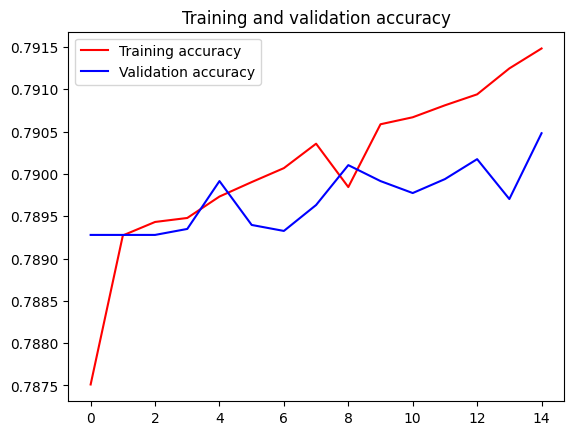

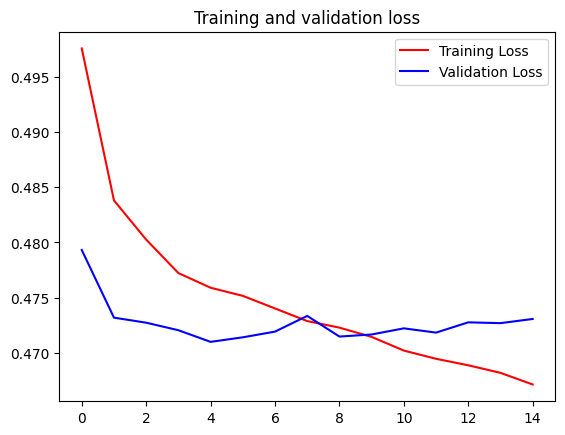

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
key = ['RandomForestClassifier',
       'GradientBoostingClassifier',
       'LogisticRegression',
       'NeuralNetwork']

value = [RandomForestClassifier(n_estimators=100, random_state=0, max_depth=None),
         GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
         LogisticRegression(max_iter=1000),
         model]

models = dict(zip(key, value))

In [ ]:
accuracy = pd.DataFrame(columns=['Accuracy Score'], index=key)

for name, algo in models.items():

  model = algo
  model.fit(X_train,y_train)

  if name == 'NeuralNetwork':
    predict = (model.predict(X_test) > 0.5).astype("int32")
  else:
    predict = model.predict(X_test)

  accuracy.loc[name] = accuracy_score(y_test, predict)

accuracy

5303/5303 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.7892 - loss: 0.4747
1326/1326 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


,Accuracy Score
RandomForestClassifier,0.79034
GradientBoostingClassifier,0.792273
LogisticRegression,0.792744
NeuralNetwork,0.78968


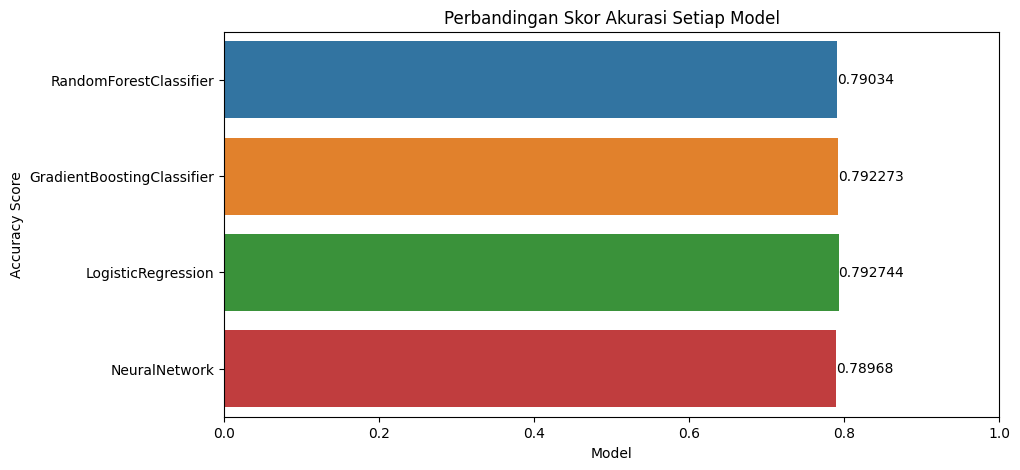

In [ ]:
plt.figure(figsize=(10, 5))

ax = sns.barplot(data=accuracy, x="Accuracy Score", y=accuracy.index, hue=accuracy.index, legend=False, orient='y')

for i, container in enumerate(ax.containers):
    ax.bar_label(container, fontsize=10)

ax.set_title('Perbandingan Skor Akurasi Setiap Model')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.xlim(0, 1)

plt.show()

# Evaluation


*   Confusion Matrix



In [ ]:
confusion_matrices = {}

for name, algo in models.items():
    confusion_matrices[name] = confusion_matrix(y_test, predict)

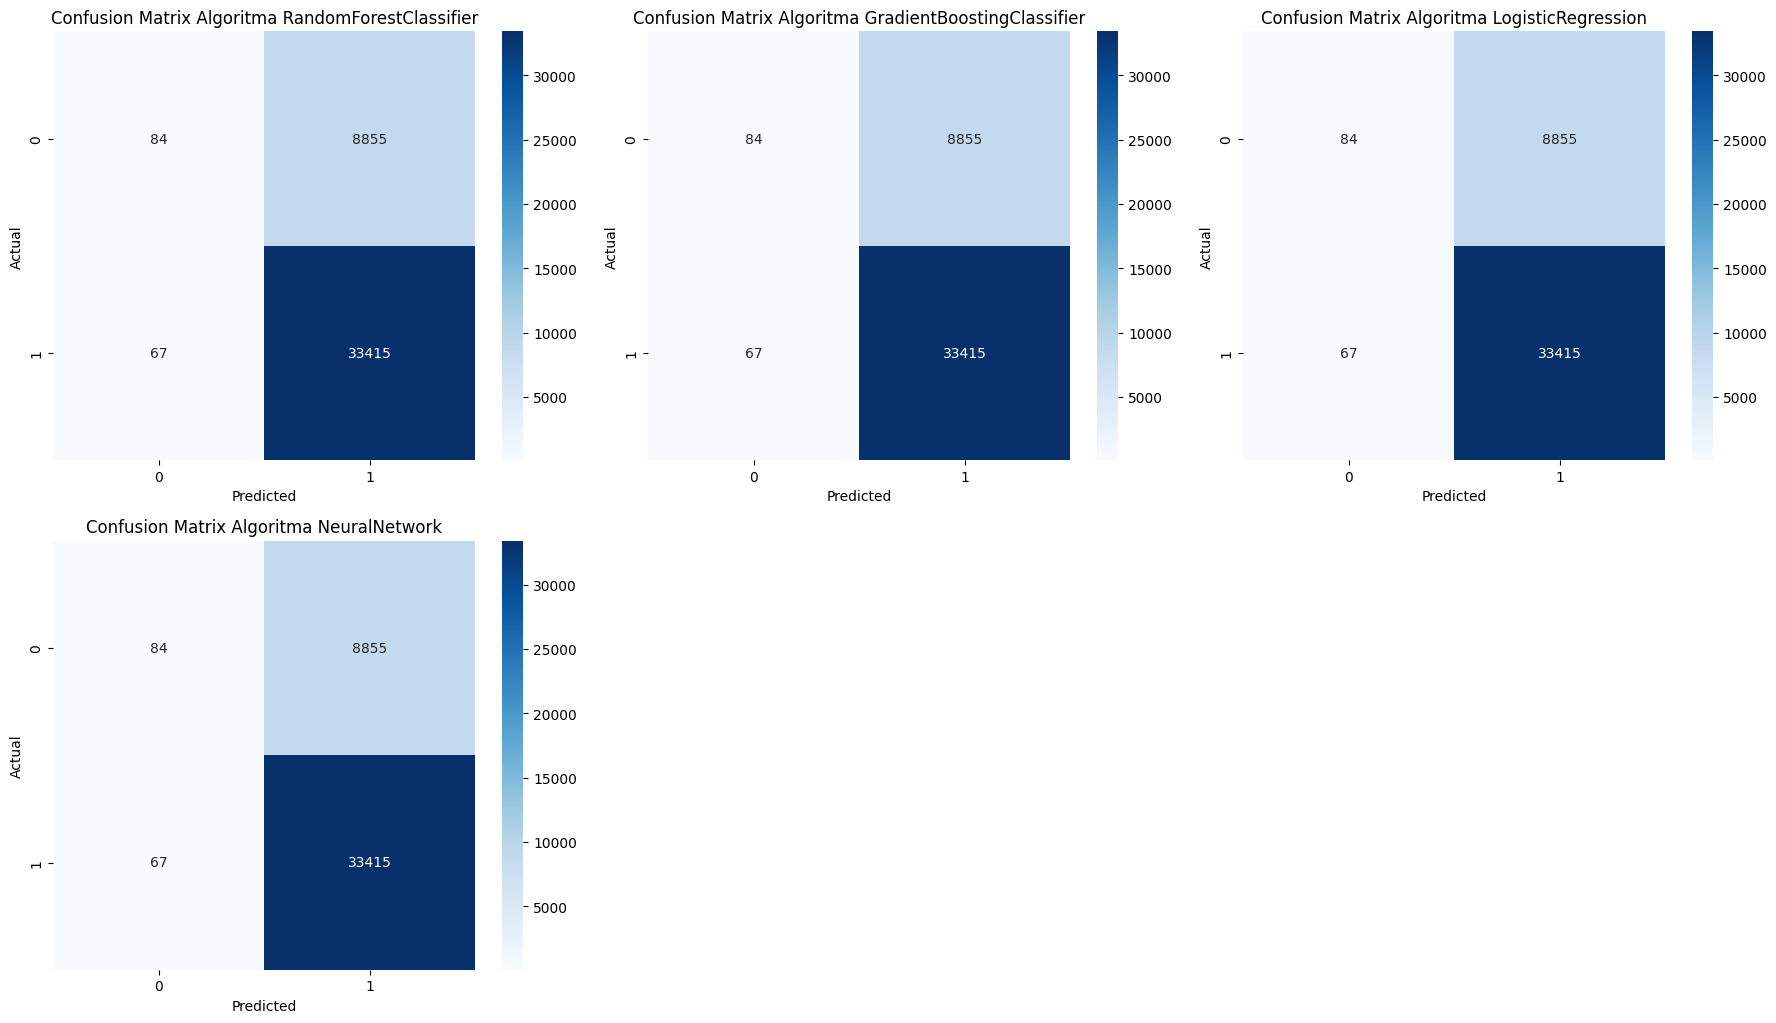

In [ ]:
plt.figure(figsize=(18, 15))
for i, (name, matrix) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(3, 3, i)
    sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix Algoritma {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()



*   Classification Report


In [ ]:
#Cek model performance menggunakan classification_report
classification_reports = {}

for name, algo in models.items():

    report = classification_report(y_test, predict)
    classification_reports[name] = report

In [ ]:
for name, report in classification_reports.items():
    print(f"Classification Report Algoritma {name}:\n{report}\n")

Classification Report Algoritma RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.56      0.01      0.02      8939
           1       0.79      1.00      0.88     33482

    accuracy                           0.79     42421
   macro avg       0.67      0.50      0.45     42421
weighted avg       0.74      0.79      0.70     42421


Classification Report Algoritma GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.56      0.01      0.02      8939
           1       0.79      1.00      0.88     33482

    accuracy                           0.79     42421
   macro avg       0.67      0.50      0.45     42421
weighted avg       0.74      0.79      0.70     42421


Classification Report Algoritma LogisticRegression:
              precision    recall  f1-score   support

           0       0.56      0.01      0.02      8939
           1       0.79      1.00      0.88     33482

    accuracy

# ROC Curve dan AUC

In [ ]:
auc_scores = pd.DataFrame(columns=['AUC'], index=key)

5303/5303 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.7894 - loss: 0.4731
1326/1326 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


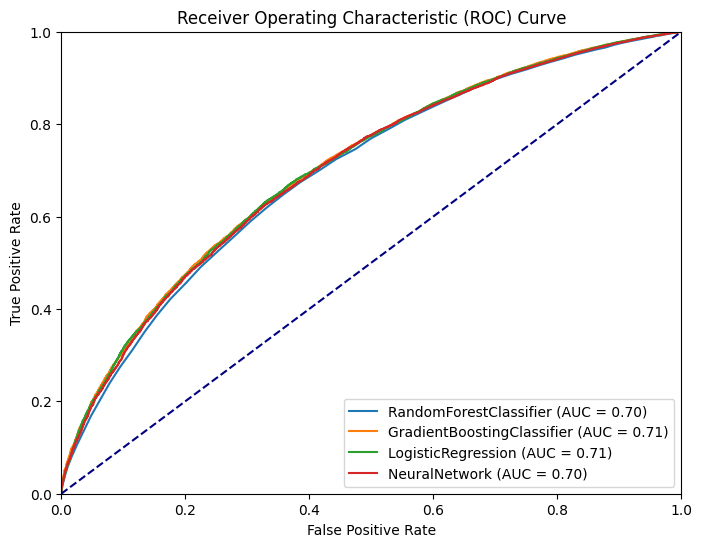

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
plt.figure(figsize=(8, 6))

for name, algo in models.items():
    model = algo
    model.fit(X_train, y_train)

    if name == 'NeuralNetwork':
        predict = model.predict(X_test)
    else:
        predict = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, predict)
    roc_auc = auc(fpr, tpr)

    auc_scores.loc[name] = roc_auc

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()

In [ ]:
auc_scores

,AUC
RandomForestClassifier,0.696364
GradientBoostingClassifier,0.706619
LogisticRegression,0.705392
NeuralNetwork,0.702499


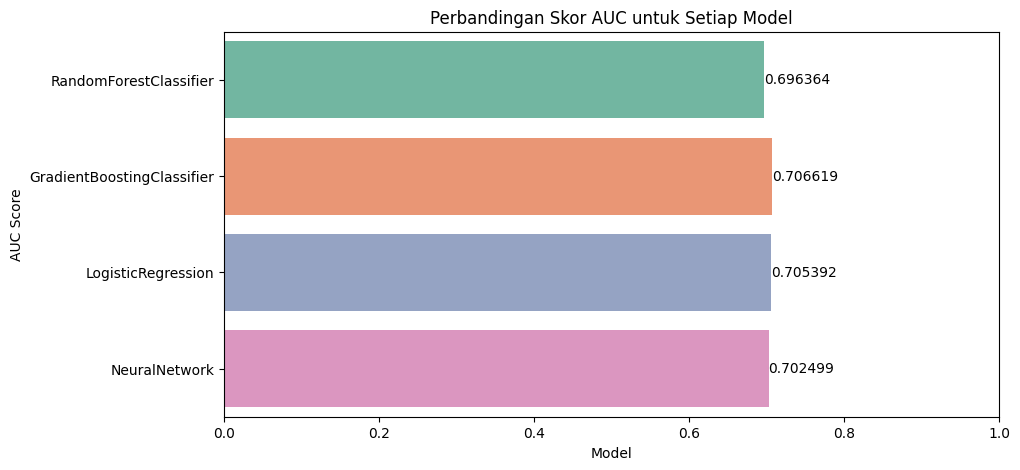

In [ ]:
plt.figure(figsize=(10, 5))

ax = sns.barplot(data=auc_scores, x="AUC", y=auc_scores.index, hue=auc_scores.index, palette='Set2', legend=False, orient='y')

for i, container in enumerate(ax.containers):
    ax.bar_label(container, fontsize=10)

ax.set_title('Perbandingan Skor AUC untuk Setiap Model')
plt.xlabel('Model')
plt.ylabel('AUC Score')
plt.xlim(0, 1)

plt.show()